## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 📊
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings


# Explorar dataset

In [2]:
# Lectura del csv
df = pd.read_csv(r"Datos_TP_final.csv")

In [3]:
df.head(3)

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,...,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,Unnamed: 34
0,2001/02,Neutro,TEMPEL N2,64.8,353,140,156,52,moderadamente susceptible,0.21,...,0.61,0.62,0.49,0.47,0.51,6675,1458,677,1064,NaN
1,2001/02,Neutro,3D,118.4,353,140,156,34,practicamente no susceptible,0.51,...,0.30,0.58,0.19,0.16,0.30,8357,1463,696,1111,NaN
2,2001/02,Neutro,6NORTE,143.6,353,140,156,32,moderadamente susceptible,0.48,...,0.29,0.34,0.19,0.16,0.33,7296,1459,689,1093,NaN


In [4]:
# Visualizar las dimensiones del dataframe
df.shape
print("El dataframe tiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataframe tiene 176 filas y 35 columnas


In [5]:
# valor_especifico = ["CANADA", "3C3 RIEGO", " 1C3 RIEGO", "1C1 RIEGO", "TEMPEL", "1C2"]  # Cambia esto al valor específico que deseas mantener

# # Aplica una condición para seleccionar las filas que NO deseas eliminar
# condicion = ~df["LOTE"].isin(valor_especifico)

# # Utiliza la función 'loc' para mantener solo las filas que cumplen con la condición
# df = df.loc[condicion]

In [6]:
# Obtén la columna "RINDE"
rinde_column = df.pop("RINDE")
# Agrega la columna "RINDE" al final del DataFrame
df["RINDE"] = rinde_column
df = df.drop(["Unnamed: 34", "CICLO", "LOTE"], axis=1)
df

,EVENTO,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,...,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,H_Nov,H_Dic,H_Ene,RINDE
0,Neutro,64.8,353,140,156,52,moderadamente susceptible,0.21,0.20,0.24,...,0.62,0.61,0.62,0.49,0.47,0.51,1458,677,1064,6675
1,Neutro,118.4,353,140,156,34,practicamente no susceptible,0.51,0.46,0.62,...,0.38,0.30,0.58,0.19,0.16,0.30,1463,696,1111,8357
2,Neutro,143.6,353,140,156,32,moderadamente susceptible,0.48,0.46,0.51,...,0.31,0.29,0.34,0.19,0.16,0.33,1459,689,1093,7296
3,Neutro,143.1,358,136,120,32,moderadamente susceptible,0.33,0.25,0.48,...,0.59,0.45,0.76,0.47,0.32,0.60,1455,689,1092,4668
4,Neutro,69.4,337,153,170,50,moderadamente susceptible,0.37,0.24,0.43,...,0.51,0.48,0.53,0.30,0.29,0.34,1483,759,1239,5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Niña,92.3,231,367,399,40,moderadamente susceptible,0.34,0.30,0.39,...,0.56,0.53,0.59,0.39,0.34,0.41,783,1315,1483,6484
172,Niña,213.8,228,389,407,50,practicamente no susceptible,0.41,0.35,0.47,...,0.44,0.40,0.53,0.27,0.21,0.47,770,1328,1480,8030
173,Niña,79.1,231,367,399,73,levemente susceptible,0.34,0.32,0.38,...,0.54,0.50,0.68,0.26,0.25,0.28,783,1307,1490,6507
174,Niña,129.1,228,389,407,32,moderadamente susceptible,0.38,0.33,0.52,...,0.58,0.47,0.73,0.37,0.32,0.52,779,1318,1482,7896


In [7]:
df.value_counts("EVENTO")

EVENTO
Niña      77
Niño      69
Neutro    30
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENTO             176 non-null    object 
 1   SUP                176 non-null    float64
 2   pp Nov             176 non-null    object 
 3   pp Dic             176 non-null    object 
 4   pp Ene             176 non-null    object 
 5   IPC                176 non-null    object 
 6   EROSION POTENCIAL  176 non-null    object 
 7   EVI 1 Nov media    176 non-null    float64
 8   EVI 1 Nov min      176 non-null    float64
 9   EVI 1 Nov max      176 non-null    float64
 10  EVI 17 Nov media   176 non-null    float64
 11  EVI 17 Nov min     176 non-null    float64
 12  EVI 17 Nov max     176 non-null    float64
 13  EVI 3 Dic media    176 non-null    float64
 14  EVI 3 Dic min      176 non-null    float64
 15  EVI 3 Dic max      176 non-null    float64
 16  EVI 19 Dic media   176 non

In [9]:
object_columns = df.select_dtypes(include=['object'])

print(object_columns.columns)

Index(['EVENTO', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC', 'EROSION POTENCIAL',
       'H_Nov', 'H_Dic', 'H_Ene'],
      dtype='object')


In [10]:
class ConvertObjectToInt:
    def __init__(self, df, columns_to_convert):
        self.df = df
        self.columns_to_convert = columns_to_convert

    def convert_columns(self):
        for column in self.columns_to_convert:
            if self.df[column].dtype == 'object':
                try:
                    # Intenta convertir valores válidos a numéricos y establecer los no válidos como NaN
                    self.df[column] = pd.to_numeric(self.df[column], errors='coerce')
                    # Rellena los NaN con un valor predeterminado (por ejemplo, 0)
                    self.df[column].fillna(0, inplace=True)
                    # Convierte la columna a tipo int
                    self.df[column] = self.df[column].astype(int)
                except ValueError as e:
                    print(f"Error al convertir la columna {column}: {e}")

In [11]:
columns_to_convert = ["pp Nov", "pp Dic", 'pp Ene', 'H_Nov', 'H_Dic', "H_Ene", "IPC"]

converter = ConvertObjectToInt(df, columns_to_convert)
converter.convert_columns()

# Graficos

In [12]:
df_categorico = df.select_dtypes(exclude=['object'])

### Optimizacion de variables:
Debido a que se cuenta con columnas de datos sumamente parecidas como las de los valores de indice EVI minimo medio y maximo para 2 fechas puntuales en un mes, se opto por agrupar estos tipos de columnas para que solo quede 1 columna de indice EVI medio, minimo y maximo por mes.

In [13]:
# Columnas para EVI media y EVI min/max de cada mes
columns_to_average = [
    'EVI 1 Nov media', 'EVI 17 Nov media',
    'EVI 3 Dic media', 'EVI 19 Dic media',
    'EVI 1 Ene media', 'EVI 17 Ene media',
    'EVI 2 Feb media']

columns_to_min_max = [
    'EVI 1 Nov min', 'EVI 17 Nov min',
    'EVI 1 Nov max', 'EVI 17 Nov max',
    'EVI 3 Dic min', 'EVI 19 Dic min',
    'EVI 3 Dic max', 'EVI 19 Dic max',
    'EVI 1 Ene min', 'EVI 17 Ene min',
    'EVI 1 Ene max', 'EVI 17 Ene max',
    'EVI 2 Feb min', 'EVI 2 Feb max'
]

# Crea nuevos DataFrames para EVI media y EVI min/max
df_monthly_media = df[columns_to_average]
df_monthly_min_max = df[columns_to_min_max]

# Calcula los promedios para EVI media
df['EVI Nov mean'] = df_monthly_media[['EVI 1 Nov media', 'EVI 17 Nov media']].mean(axis=1)
df['EVI Dic mean'] = df_monthly_media['EVI 3 Dic media']
df['EVI Ene mean'] = df_monthly_media[['EVI 1 Ene media', 'EVI 17 Ene media']].mean(axis=1)
df['EVI Feb mean'] = df_monthly_media['EVI 2 Feb media']

# Calcula los promedios para EVI min/max
df['EVI Nov min'] = df_monthly_min_max[['EVI 1 Nov min', 'EVI 17 Nov min']].mean(axis=1)
df['EVI Nov max'] = df_monthly_min_max[['EVI 1 Nov max', 'EVI 17 Nov max']].mean(axis=1)
df['EVI Dic min'] = df_monthly_min_max[['EVI 3 Dic min', 'EVI 19 Dic min']].mean(axis=1)
df['EVI Dic max'] = df_monthly_min_max[['EVI 3 Dic max', 'EVI 19 Dic max']].mean(axis=1)
df['EVI Ene min'] = df_monthly_min_max[['EVI 1 Ene min', 'EVI 17 Ene min']].mean(axis=1)
df['EVI Ene max'] = df_monthly_min_max[['EVI 1 Ene max', 'EVI 17 Ene max']].mean(axis=1)
df['EVI Feb min'] = df_monthly_min_max[['EVI 2 Feb min']].copy()
df['EVI Feb max'] = df_monthly_min_max[['EVI 2 Feb max']].copy()

# Elimina las columnas originales de EVI media y EVI min/max
df.drop(columns=columns_to_average + columns_to_min_max, inplace=True)

Se realiazon graficos de tipo scatter para cada una de las caracteristcas vs el target "Rinde", la intencion es conocer como se relaciona cada variable con los datos a predecir. De esta manera obtenemos intuiciones visuales sobre aquellas variables que tienen cierta tendencia ya sea lineal o polinomica y aquellas variables que no poseen ningun patron especifico con respecto a la variable a predecir. Ademas, se agrego la dimension del fenomeno de Niño Niña o Neutro para obtener tambien intuiciones sobre esta varible sobre el comportamiento de las demas. 

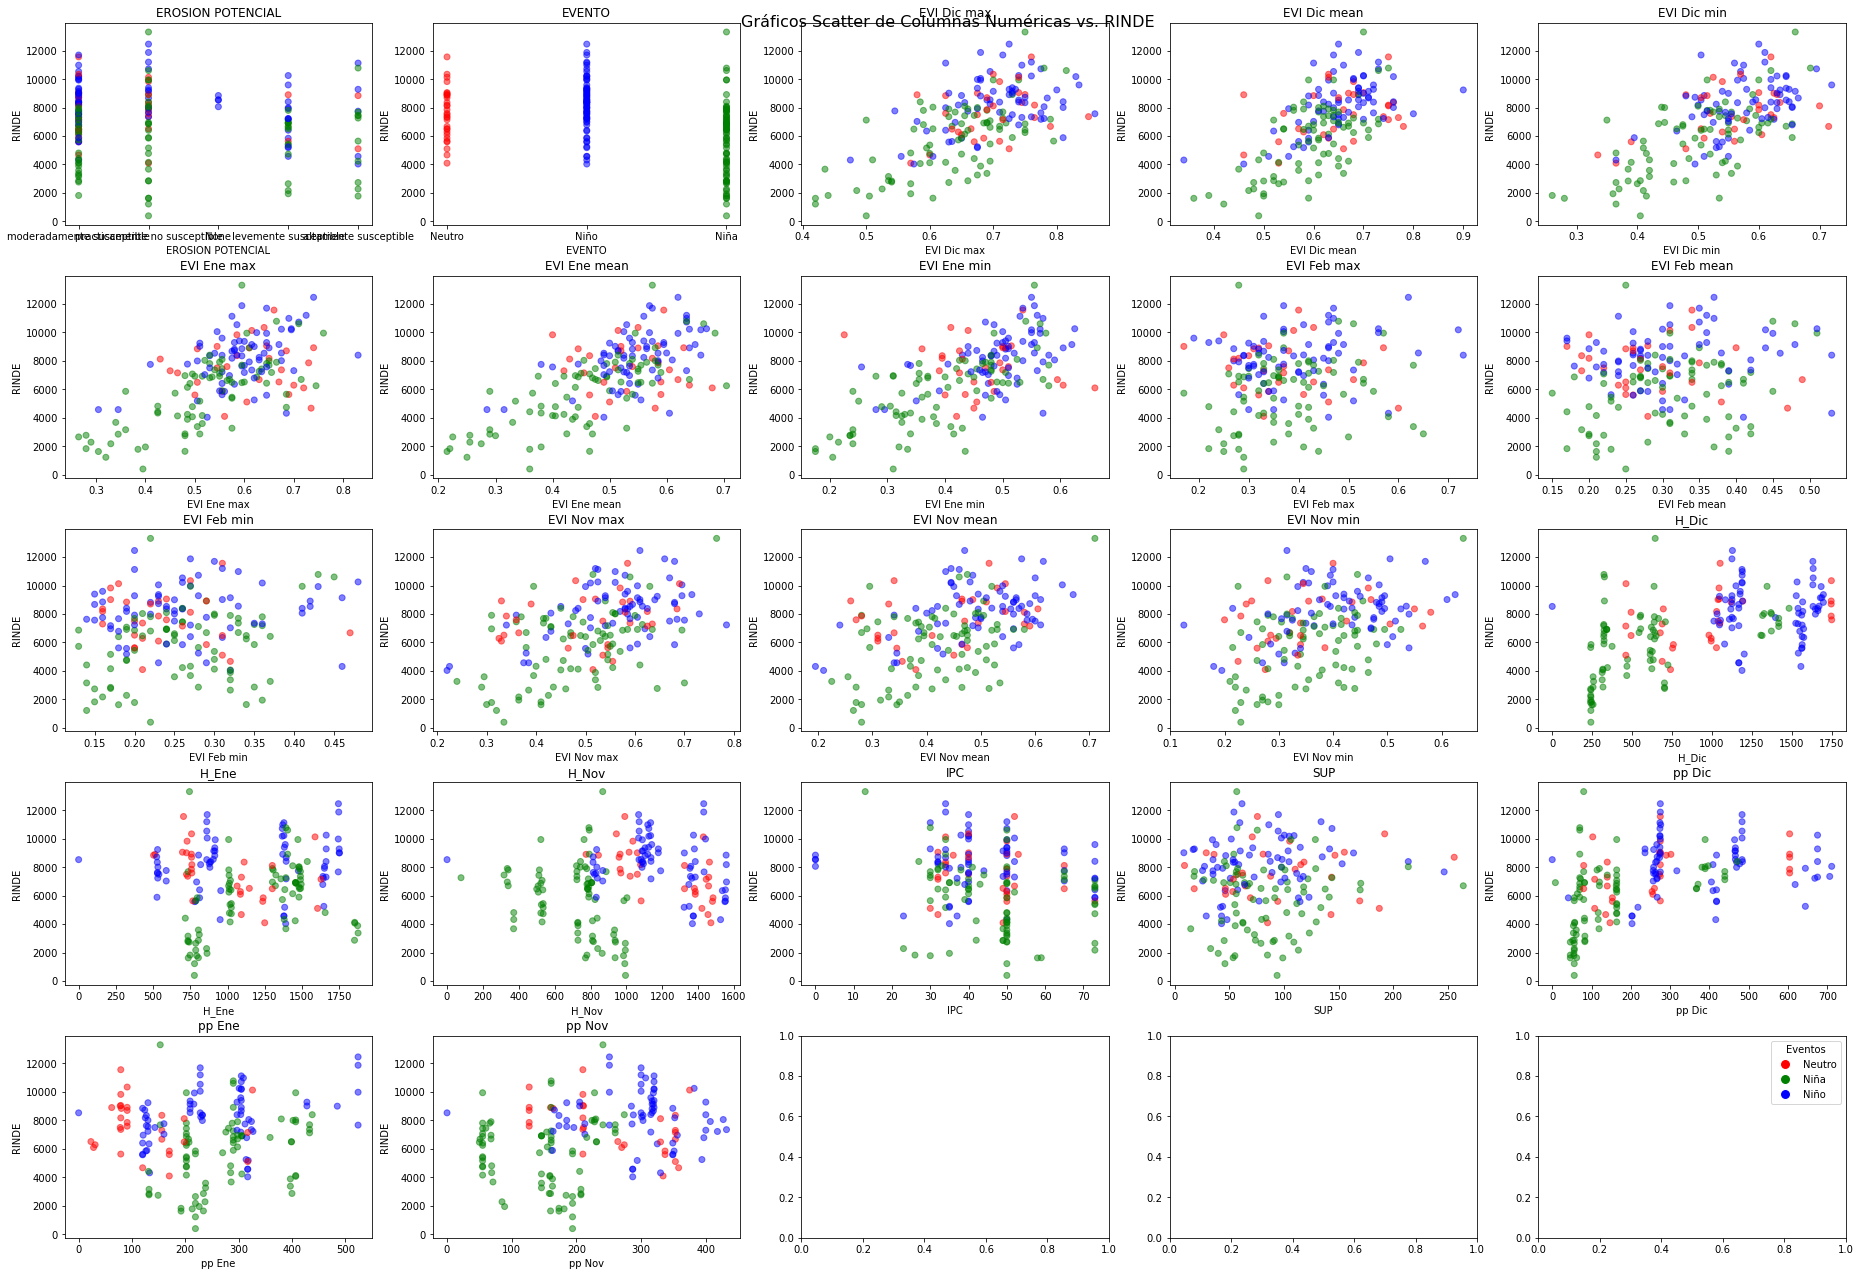

In [14]:
columnas_numericas = df.columns.difference(['RINDE'])

num_filas = 5  
num_columnas = 5  

# Mapeo de colores para los eventos
colores_evento = {'Neutro': 'red', 'Niña': 'green', 'Niño': 'blue'}

# Crea un nuevo plot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(26, 18))
fig.tight_layout(pad=3.0)  # Ajusta el espaciado entre los gráficos

# Itera a través de las columnas numéricas y crea los gráficos scatter
for i, columna in enumerate(columnas_numericas):
    fila = i // num_columnas
    columna_actual = i % num_columnas
    evento = df['EVENTO']  # Suponiendo que la columna se llama 'EVENTO'
    colores = [colores_evento[e] for e in evento]  # Asigna colores según el evento
    axs[fila, columna_actual].scatter(df[columna], df['RINDE'], alpha=0.5, c=colores)
    axs[fila, columna_actual].set_title(columna)
    axs[fila, columna_actual].set_xlabel(columna)
    axs[fila, columna_actual].set_ylabel('RINDE')

# Crea una barra de color (leyenda) para los eventos
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores_evento[evento], markersize=10, label=evento) for evento in colores_evento.keys()]
plt.legend(handles=handles, title='Eventos', loc='upper right')

# Añade un título general al gran plot
plt.suptitle("Gráficos Scatter de Columnas Numéricas vs. RINDE", fontsize=16)

# Muestra el plot
plt.show()

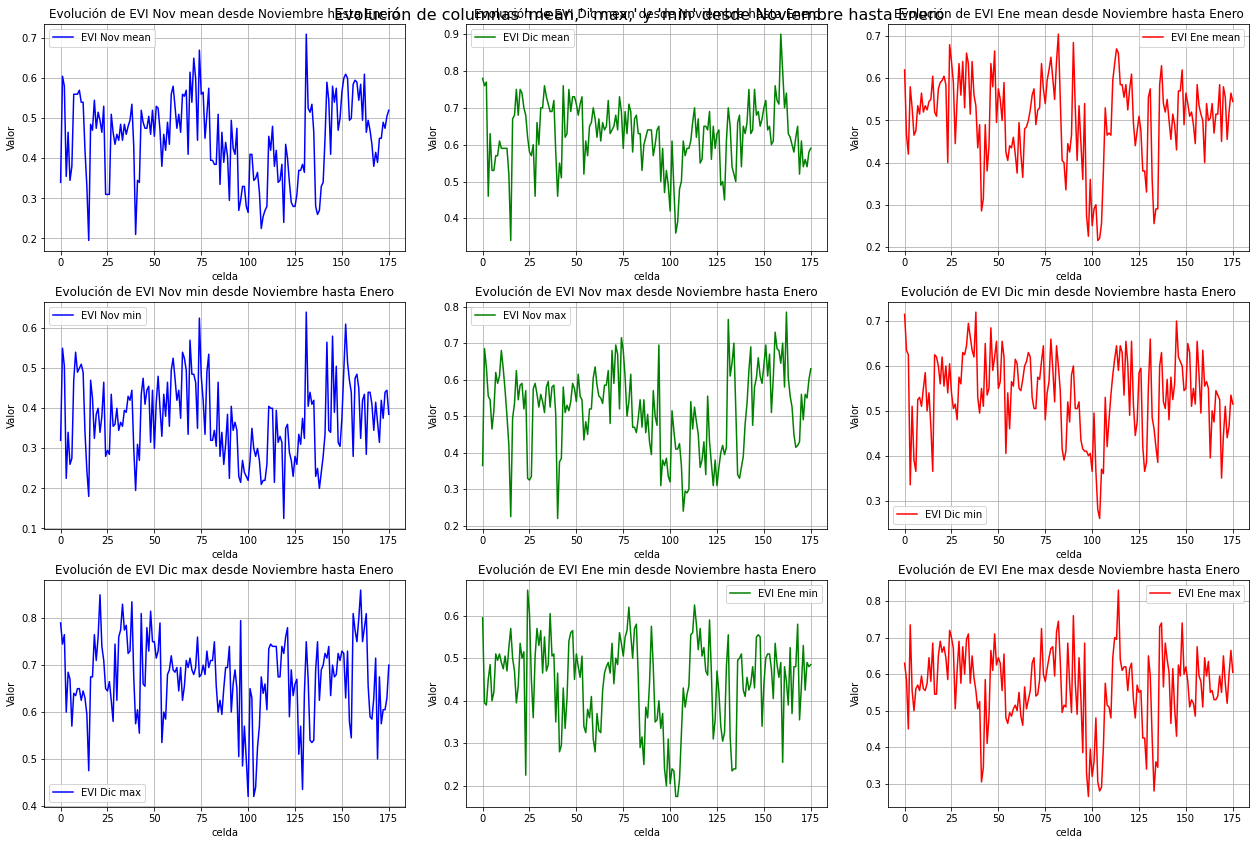

In [15]:
# Selecciona las columnas relevantes
columnas_interes = ['EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 
                    'EVI Nov min', 'EVI Nov max', 'EVI Dic min', 
                    'EVI Dic max', 'EVI Ene min', 'EVI Ene max']

# Crea un gráfico de líneas para cada grupo de columnas ('mean,' 'max,' y 'min') en subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.tight_layout(pad=3.0)

# Define colores para 'mean,' 'max,' y 'min'
colores = ['blue', 'green', 'red', 'blue', 'green', 'red', 'blue', 'green', 'red']

# Itera a través de las columnas de interés y asigna colores a cada grupo
for i, columna in enumerate(columnas_interes):
    fila = i // 3
    columna_actual = i % 3
    axs[fila, columna_actual].plot(df.index, df[columna], label=columna, color=colores[i])
    axs[fila, columna_actual].set_xlabel('celda')
    axs[fila, columna_actual].set_ylabel('Valor')
    axs[fila, columna_actual].set_title(f'Evolución de {columna} desde Noviembre hasta Enero')
    axs[fila, columna_actual].legend()
    axs[fila, columna_actual].grid(True)

# Añade un título general al gran plot
plt.suptitle("Evolución de columnas 'mean,' 'max,' y 'min' desde Noviembre hasta Enero", fontsize=16)

# Muestra el gran plot
plt.show()

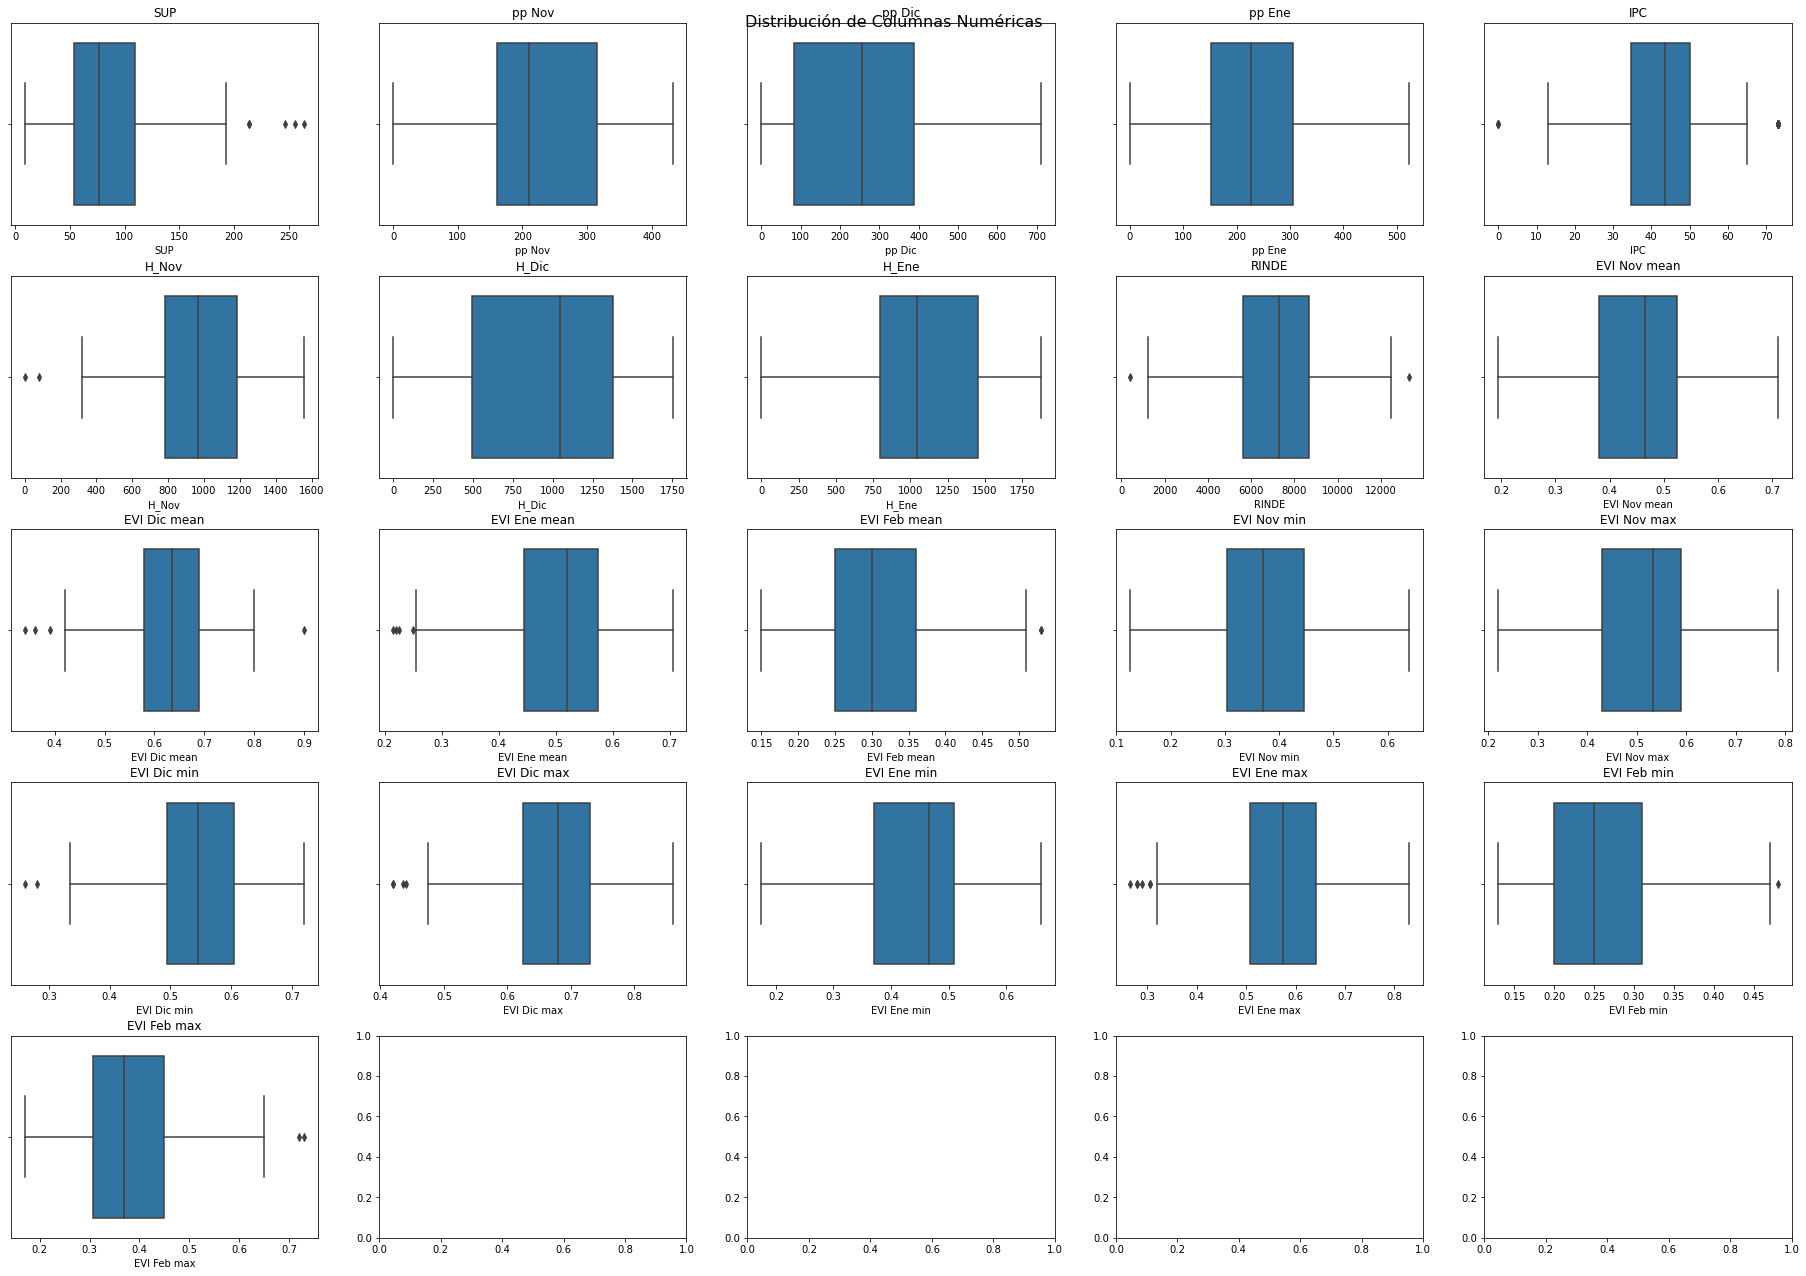

In [16]:
import warnings
warnings.filterwarnings('ignore')

columnas_numericas = df.select_dtypes(exclude=['object'])

num_filas = 5  # Cambia esto según tus preferencias
num_columnas = 5  # Cambia esto según tus preferencias

# Crea un nuevo plot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(26, 18))
fig.tight_layout(pad=3.0)  # Ajusta el espaciado entre los gráficos

# Itera a través de las columnas numéricas y crea los boxplots
for i, columna in enumerate(columnas_numericas):
    fila = i // num_columnas
    columna_actual = i % num_columnas
    sns.boxplot(data=df, x=columna, ax=axs[fila, columna_actual],orient='v')
    axs[fila, columna_actual].set_title(columna)
    axs[fila, columna_actual].set_xlabel(columna)

# Añade un título general al gran plot
plt.suptitle("Distribución de Columnas Numéricas", fontsize=16)

# Muestra el plot
plt.show()

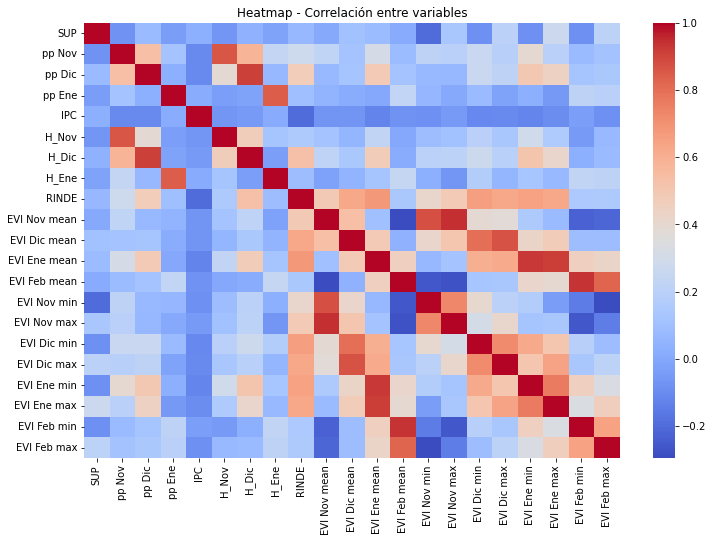

In [17]:
# Generar la matriz de correlación
corr_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap - Correlación entre variables')
plt.show()

# Seleccion caracteristicas

In [18]:
print(df.columns)

Index(['EVENTO', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'H_Nov', 'H_Dic', 'H_Ene', 'RINDE', 'EVI Nov mean',
       'EVI Dic mean', 'EVI Ene mean', 'EVI Feb mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max', 'EVI Feb min', 'EVI Feb max'],
      dtype='object')


A partir de las intuiciones obtenidas en el apartado de analisis grafico de los datos se creo un nuevo dataframe reducido con las caracteristicas mas idoneas para generar modelos optimos. 

In [19]:
# Seleccionar las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['EVENTO','EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene','RINDE']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reduc = df[columnas_seleccionadas]

## Diviison del conjunto de datos:

Para el caso de estudio se opto por la estrategia de dividir el conjunto de datos en train y test, esto se hizo con la libreria sklearn, particularmente con el modulo de train_test_split. Se decidio dejar un 30% de los datos para test y por lo tanto un 70% de los mismos fueron utilizados en el entrenamiento de los diferentes modelos.

In [20]:
X = df_reduc.drop(columns=['RINDE'])  
y = df_reduc['RINDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convierte los arrays de NumPy a DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [21]:
X_train

,EVENTO,EVI Nov mean,EVI Dic mean,EVI Ene mean,EVI Nov min,EVI Nov max,EVI Dic min,EVI Dic max,EVI Ene min,EVI Ene max,H_Nov,H_Dic,H_Ene
152,Niño,0.610,0.64,0.510,0.610,0.610,0.630,0.630,0.510,0.510,1178,1126,1749
128,Niña,0.370,0.50,0.380,0.310,0.420,0.365,0.570,0.305,0.425,372,472,1655
104,Niña,0.350,0.39,0.220,0.280,0.410,0.260,0.440,0.175,0.280,780,246,748
78,Niño,0.510,0.71,0.650,0.490,0.540,0.660,0.730,0.620,0.670,1087,1680,915
36,Niño,0.480,0.69,0.640,0.430,0.525,0.635,0.725,0.605,0.650,1119,1192,1370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Niño,0.650,0.68,0.525,0.485,0.695,0.575,0.680,0.500,0.545,1068,1633,863
106,Niña,0.315,0.50,0.380,0.270,0.365,0.360,0.570,0.320,0.400,865,241,862
14,Niño,0.330,0.52,0.550,0.245,0.420,0.465,0.595,0.525,0.580,1535,1576,954
92,Niña,0.425,0.60,0.405,0.345,0.500,0.505,0.660,0.350,0.490,534,616,1023


# Preprosesamiento

Para el preprocesamiento se utilizo un enfoque de programacion oreintada a objetos (poo). Este enfoque permite una mayor legibilidad y escalabilidad del codigo a la vez que permite ahorrar pasos y lineas del mismo. Otra de las grandes ventajas es que es facilmente reutilizable tanto en este caso como en otros. 
La logica general de esta metodologia es crear objetos que tomen como argumentos a los dataframes y devuelvan estos mismos luego de haberles aplicado un proceso de dummificacion escalado, normalizado, etc.

## Dummificación

Este paso del prepocesamiento crea una clase capaz de generar objetos de tipo "CustomOneHotEncoding", los cuales toman como argumento a un df
y a las columnas que se quieran transformar. El resultado es un nuevo dataframe con las columnas seleccionadas dummificadas utilizando el metodo de sklearn OneHotEncoder.


In [22]:
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_encode):
        self.columns_to_encode = columns_to_encode
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None

    def fit(self, X, y=None):
        X_cat = X[self.columns_to_encode]
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy[self.columns_to_encode]
        X_num = X_copy.drop(self.columns_to_encode, axis=1)
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh,
                                columns=self._columns,
                                index=X_copy.index)
        X_copy = X_num.join(X_cat_oh)
        return X_copy

In [23]:
columns_to_encode = ['EVENTO']

custom_encoder = CustomOneHotEncoding(columns_to_encode)

X_train_dum = custom_encoder.fit_transform(X_train)
X_test_dum = custom_encoder.fit_transform(X_test)

## Escalado
En este paso del preprocesado tomamos el dataframe previamente dummificado, instanciamos un objeto de CustomScaler y lo pasamos como argumento del mismo. Esto devolvera un nuevo dataframe con todas las columnas escaladas segun el metodo RobustScaler de sklearn.

In [24]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.robust_scaler = RobustScaler()
        self.robust_scaler.fit(X)
        return self
    
    def transform(self, X, y=None):
        X_scaled = self.robust_scaler.transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        return X_scaled_df

In [25]:
custom_scaler = CustomScaler()

X_train_pro = custom_scaler.fit_transform(X_train_dum)
X_test_pro = custom_scaler.fit_transform(X_test_dum)

# Modelado

Una vez disponemos del dataframe preprocesado podemos comenzar a implementar diferentes tipos de modelos con el fin de compararlos entre si y medir su eficiencia a la hora de hacer predicciones.

### Metricas utilizadas para medir la eficiencia de los modelos:

- Error Cuadrático Medio (MSE - Mean Squared Error):
    El Error Cuadrático Medio es una métrica que mide la cantidad promedio por la cual los valores predichos de un modelo de regresión se desvían de los valores reales. Para calcularlo, se toma la diferencia entre las predicciones del modelo y los valores reales, se eleva al cuadrado cada una de estas diferencias, se promedian todos los cuadrados y se obtiene la raíz cuadrada del resultado. Cuanto más cercano a cero, mejor es el modelo.

- Error Absoluto Medio (MAE - Mean Absolute Error):
    El Error Absoluto Medio mide el valor absoluto promedio de las diferencias entre las predicciones del modelo y los valores reales. A diferencia del MSE, no eleva al cuadrado las diferencias.Mide la magnitud promedio de los errores.
    
- Coeficiente de Determinación (R2- R-squared):
    El coeficiente de determinación, comúnmente conocido como R2, es una métrica que proporciona información sobre cuánta varianza en la variable dependiente (la que se está prediciendo) es explicada por el modelo de regresión. R2 tiene un valor entre 0 y 1, y cuanto más cerca esté de 1, mejor es el ajuste del modelo a los datos. En otras palabras,R2  mide cuánta de la variabilidad en los datos es "capturada" por el modelo.


## *Regresion Lineal*
El primer modelo que se implemento es el mas sencillo de todos, la regresion lineal, este modelo genera la recta que mejor pueda explicar el comportamiento de los datos, es decir aquella que minimice el error cuadratico medio entre los valores reales y los valores predichos. Para su implementacion se utilizo de la libreria sklearn el modulo LinearRegresion.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Ajusta el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_pro, y_train)

# Predice los valores en el conjunto de prueba
y_pred = lin_reg.predict(X_test_pro)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 1977902.0300625267
Error absoluto medio (MSE): 1053.3498612637447
Coeficiente de determinación (R^2): 0.5960031828622412


### *Resultados del modelo:* 
Como se puede observar el modelo ajusta una recta con un r2 de 0.59, y un error absoluto medio de 1053 kilos lo cual a los fines de este trabajo no resulta muy eficiente. 

### Graficos extra: 
Se generaron rectas de regresion lineal para cada una de las columnas originales con respecto a la columna de rinde, esto fue con motivo de intentar entender como cada variable se esta comportando a la hora de hacer predicciones. Observamos que en norma general las columas de indice EVI tienen a ajustar rectas mejores que las demas columnas.

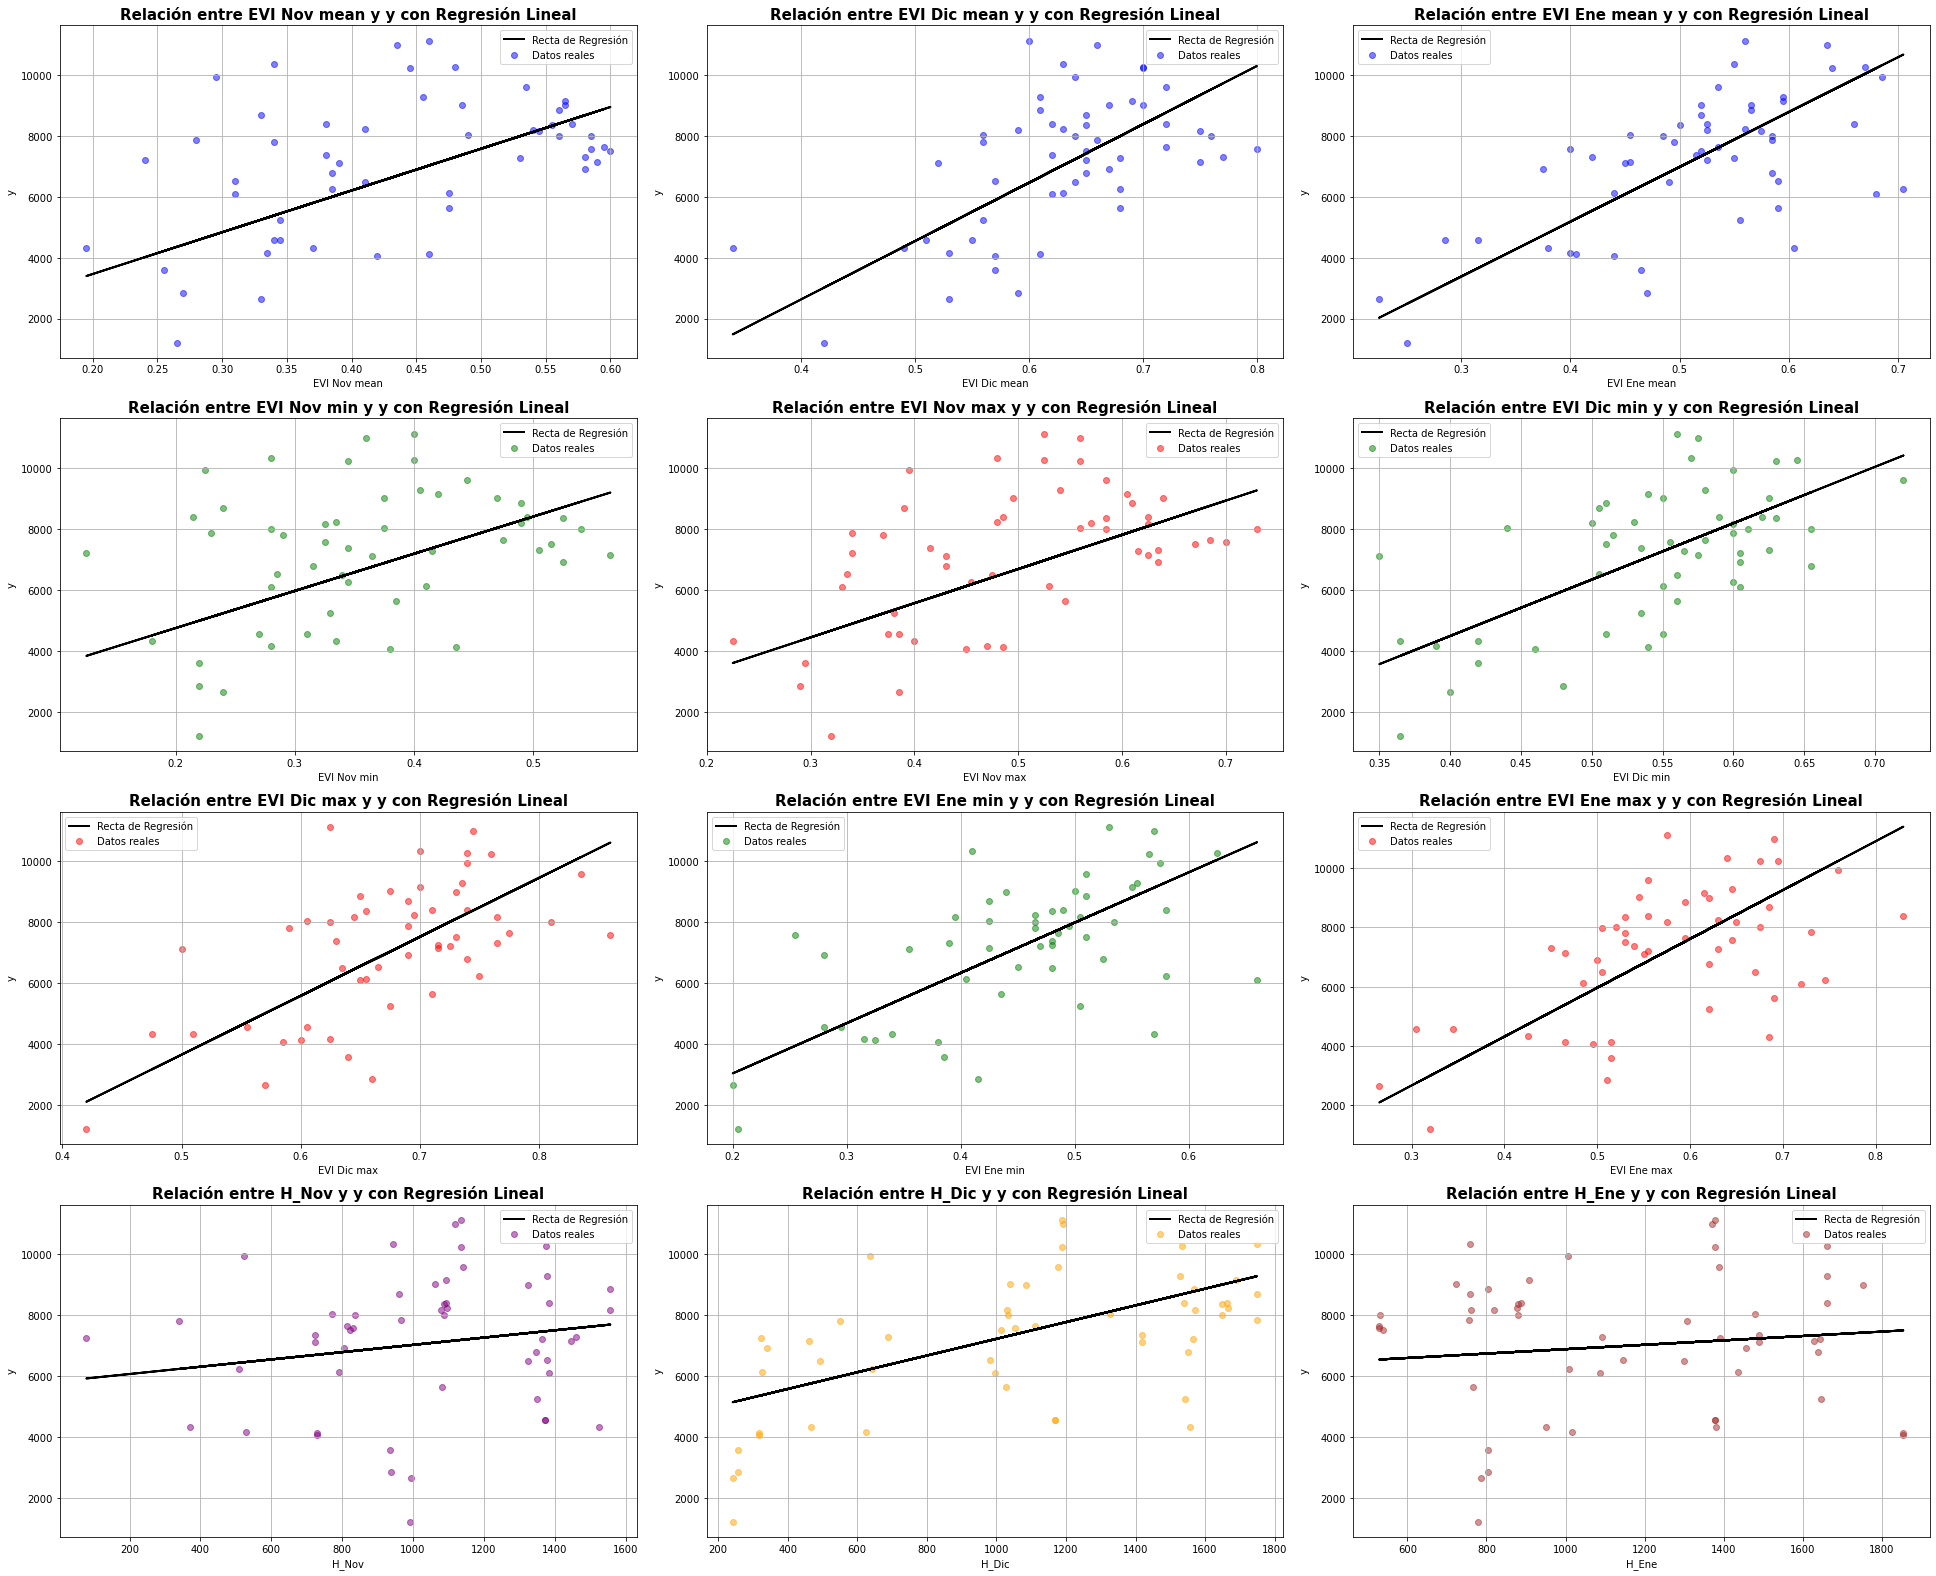

In [27]:
columns_to_plot = ['EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene',]

color_dict = {
    'mean': 'blue',
    'min': 'green',
    'max': 'red',
    'H_Nov': 'purple',
    'H_Dic': 'orange',
    'H_Ene': 'brown'
}

num_rows = 4  
num_cols = 3  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(27, 22))
fig.subplots_adjust(hspace=0.5) 

for i, column in enumerate(columns_to_plot):
    row = i // num_cols  
    col = i % num_cols   
    
    lin_reg.fit(X_train[[column]], y_train)
    
    y_pred = lin_reg.predict(X_test[[column]])
    
    for key in color_dict:
        if key in column:
            color = color_dict[key]
            break
    
    axes[row, col].scatter(X_test[column], y_test, alpha=0.5, label='Datos reales', color=color)
    axes[row, col].plot(X_test[column], y_pred, color='black', linewidth=2, label='Recta de Regresión')
    axes[row, col].set_xlabel(column)  
    axes[row, col].set_ylabel("y")      
    axes[row, col].set_title(f'Relación entre {column} y y con Regresión Lineal', fontsize=15, fontweight='bold')  
    axes[row, col].legend()             
    axes[row, col].grid(True)           

plt.tight_layout()
plt.savefig("Graficos")
plt.show()

*Extra:* se combinaron todas las columnas de indice EVI del dataframe con el proposito de intentar comprender si es que por si solas ajustan una mejor recta, pero los resultados no mejoraron con respecto a la regresion original con el dataset de entrenamiento.

In [28]:
columns_original = ['EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
                   'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min', 'EVI Ene max', 'H_Nov', 'H_Dic', 'H_Ene']

columns_mean = [col for col in columns_original if 'EVI' in col]

Evi_train = X_train[columns_mean].mean(axis=1).to_frame(name='EVI mean')
Evi_test = X_test[columns_mean].mean(axis=1).to_frame(name='EVI mean')

Error cuadrático medio (MSE): 2248469.384401548
Coeficiente de determinación (R^2): 0.5407383879871921


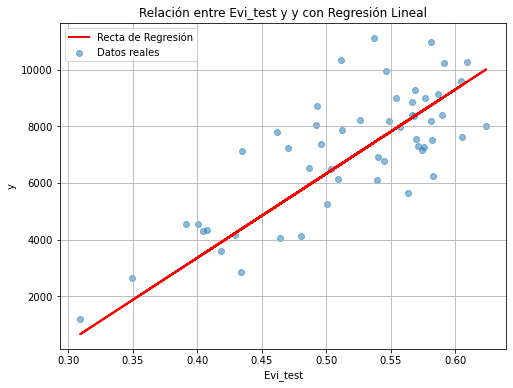

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(Evi_train, y_train)

y_pred = lin_reg.predict(Evi_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(Evi_test, y_test, alpha=0.5, label='Datos reales')  
plt.plot(Evi_test, y_pred, color='red', linewidth=2, label='Recta de Regresión') 
plt.xlabel("Evi_test")
plt.ylabel("y")  
plt.title(f'Relación entre Evi_test y y con Regresión Lineal') 
plt.legend() 
plt.grid(True)  
plt.show()

## *Random Forest:*

Para intentar conseguir una mejor prediccion de los datos, se opto por un modelo que no es precisamente lineal, se trata del modulo de sklearn de RandomForestRegressor, el cual a diferencia de la regresion lineal simple busca hacer las predicciones del target a partir de generar arboles de decision, estos toman distintos criterios de desicion (umbrales) y observan el comportamiento de los datos para esos umbrales,  dividiendo los datos segun pertenezcan o no a un rango especifico de ese umbral. El modelo de Random Forest lo que hace precisamente es generar tantos arboles como se les pase por parametros y buscar el criterio comun que haya salido del total de decisiones. Observemos los resultados...


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

random_forest = RandomForestRegressor(max_leaf_nodes=8, n_estimators=100, n_jobs=-1,
                      random_state=42)

random_forest.fit(X_train_dum, y_train)

y_pred = random_forest.predict(X_test_dum)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 1562512.7996665086
Error absoluto medio (MSE): 965.8748653096023
Coeficiente de determinación (R^2): 0.6808486021007205


### *Resultados:* 
Observamos que este modelo obtuvo mejores resultados que el de regresion lineal simple, con un r2 de 0.68 y un error absoluto medio de 965 kg. Notese que para este caso trabajamos el dataframe solo dummificado pero no escalado, ya que una caracteristica de random forest es que suele trabajar mejor con los datos originales en contraposicion con los datos escalados. Esto puede ser una ventaja, ya que los dataframes que necesita requieren menor preprocesamiento.

Tanto para este modelo como para otros (mayormente de clasificacion) existen tecnicas capaces de encontrar los hiperparametros que mejor ajusten el modelo a el caso de estudio, esto es posible gracias a un modulo de la libreria de sklearn llamado GridSearchCV, el cual genera una grilla de hiperparametros y luego genera instancias de modelado para cada una de las combinaciones que existan en la grilla. Es defir, si tenemos 3 valores para un hiperparametro y 3 para el otro se evaluaran 9 tipos de modelos diferentes. Una ventaja de este modulo es que permite extraer el mejor estimador.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Prueba 9 (3x3) combinaciones de hiperparámetros
    {'n_estimators': [100, 200, 500], 'max_leaf_nodes': [8, 16, 24]},
    # Luego prueba 6 (2x3) combinaciones con bootstrap en False
    {'bootstrap': [False], 'n_estimators': [100, 500], 'max_features': [2, 3, 4]},
]

rnd_clf = RandomForestRegressor(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

grid_search.fit(X_train_dum, y_train)
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'max_leaf_nodes': 8, 'n_estimators': 100}


Otra gran ventaja de random forest es que cuenta con un metodo llamado feature_importances_ que ordena las caracteristicas del df segun el nivel de importancia que tuvieron en el proceso de modelado. De esta manera se creo una serie ordenada de las caracteristicas mas importantes

In [32]:
random_forest.feature_importances_
feature_importances = {name: score for name, score in zip(list(X_train), random_forest.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

EVI Nov max     0.168386
EVI Ene min     0.164490
EVI Dic max     0.126802
H_Nov           0.109862
EVI Nov mean    0.105874
EVI Dic mean    0.084580
EVI Dic min     0.080455
EVI Nov min     0.050999
EVENTO          0.034648
EVI Ene max     0.022994
dtype: float64

### *Graficos RF*

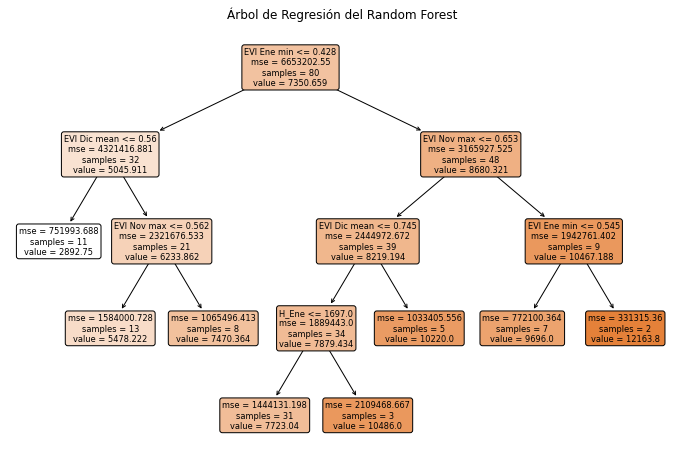

In [33]:
from sklearn.tree import plot_tree

tree = random_forest.estimators_[5]

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X_train_dum.columns, rounded=True)
plt.title("Árbol de Regresión del Random Forest")
plt.show()

## *Suport Vector Machine:*
Se genero un modelo SVM para comparar con los demas. 

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de SVM para regresión
svm_regressor = SVR(kernel='linear')

# Entrenar el modelo en los datos de entrenamiento
svm_regressor.fit(X_train_dum, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_regressor.predict(X_test_dum)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 3177069.3882168033
Error absoluto medio (MSE): 1450.8482655921707
Coeficiente de determinación (R^2): 0.35106698857838803


### *Resultados:* 
Se puede observar claramente que este fue el peor de los 3 modelos probados, con un r2 de 0.35 y un error absoluto medio de 1450 kg podemos afirmar que es el modelo que peor entiende los datos de este caso en puntual.

# CONCLUSIONES FINALES 